In [1]:
data = open('2005_2013.txt').readlines()

In [2]:
from datetime import datetime
x, y = [], []
for one_data in data:
    current_data = one_data.strip().split(' ')
    date = current_data[0].split('.')
    date = [int(item) for item in date]
    assert(len(date)==3)
    time = current_data[1].split(':')
    time = [int(item) for item in time]
    assert(len(time)==2)
    value = float(current_data[2])
    x.append(float(datetime(date[0], date[1], date[2], time[0], time[1]).strftime("%s")))
    y.append(value)
print x[0], x[1], y[0],y[1]

1104718500.0 1104719400.0 1.356 1.356


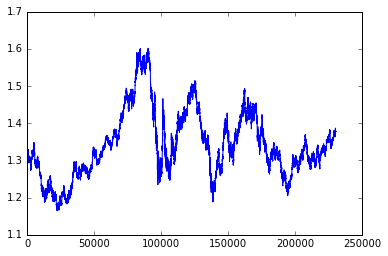

In [3]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(y)

In [4]:
x_min =  min(x)
for i in xrange(len(x)):
    x[i] = x[i] - x_min
    x[i] = x[i] / 900
print x[0], x[1], max(x), len(x)

0.0 1.0 315359.0 230341


In [5]:
import numpy as np
y_week = []
for i in xrange(len(x)/495):
    y_week.append(np.mean(y[i*495:(i+1)*495]))
print y_week[0], y_week[1]

1.33139448485 1.31466783838


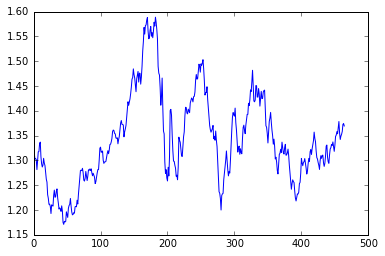

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(y_week)

In [7]:
from numpy import newaxis
def train_test_split(data, n_prev):
    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data[i:i+n_prev])
        docY.append(data[i+n_prev])
    alsX = np.array(docX)[..., newaxis]
    alsY = np.array(docY)[..., newaxis]

    test_size = 0.1
    ntrn = int(round(len(alsY) * (1 - test_size)))
    X_train = alsX[0:ntrn]
    X_test = alsX[ntrn:]
    y_train = alsY[0:ntrn]
    y_test = alsY[ntrn:]
    
    return (X_train, y_train), (X_test, y_test)

In [8]:
n_prev = 100
(X_train, y_train), (X_test, y_test) = train_test_split(y_week, n_prev)
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(329, 100, 1)
(329, 1)
(36, 100, 1)
(36, 1)


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM

Using Theano backend.
Using gpu device 0: GeForce GTX TITAN Z (CNMeM is disabled, CuDNN not available)
/usr/local/lib/python2.7/dist-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [10]:
in_out_neurons = 1
hidden_neurons = 16

model = Sequential() 
#model.add(LSTM(in_out_neurons, hidden_neurons, activation='sigmoid', inner_activation='hard_sigmoid'))
#model.add(Dropout(0.5))
model.add(LSTM(input_dim=in_out_neurons, output_dim=hidden_neurons))
model.add(Dense(input_dim=hidden_neurons, output_dim=in_out_neurons))
model.add(Activation('linear'))
model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [11]:
model.fit(X_train, y_train, nb_epoch=100, validation_split=0.05)

Train on 312 samples, validate on 17 samples
Epoch 1/100
312/312 [==============================] - 0s - loss: 0.1531 - val_loss: 0.0247
Epoch 2/100
312/312 [==============================] - 0s - loss: 0.0227 - val_loss: 0.0023
Epoch 3/100
312/312 [==============================] - 0s - loss: 0.0045 - val_loss: 5.4437e-04
Epoch 4/100
312/312 [==============================] - 0s - loss: 0.0024 - val_loss: 6.6434e-04
Epoch 5/100
312/312 [==============================] - 0s - loss: 0.0022 - val_loss: 6.5828e-04
Epoch 6/100
312/312 [==============================] - 0s - loss: 0.0021 - val_loss: 7.8786e-04
Epoch 7/100
312/312 [==============================] - 0s - loss: 0.0021 - val_loss: 6.4148e-04
Epoch 8/100
312/312 [==============================] - 0s - loss: 0.0021 - val_loss: 7.0052e-04
Epoch 9/100
312/312 [==============================] - 0s - loss: 0.0020 - val_loss: 8.6990e-04
Epoch 10/100
312/312 [==============================] - 0s - loss: 0.0020 - val_loss: 7.3471e-04
Ep

In [12]:
compute_train = model.predict(X_train)
rmse_train = np.sqrt(((compute_train - y_train) ** 2).mean(axis=0))
print rmse_train
print compute_train.shape

predicted = model.predict(X_test)
rmse = np.sqrt(((predicted - y_test) ** 2).mean(axis=0))
print rmse
print predicted.shape

[ 0.03612713]
(329, 1)
[ 0.01629769]
(36, 1)


In [13]:
b = np.array(y_week[0:n_prev])[...,newaxis]
c = np.concatenate((b, compute_train, predicted))

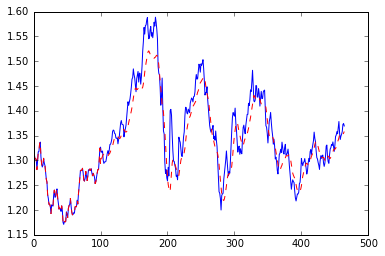

In [14]:
plt.plot(y_week, 'b-', c, 'r--')